# Titanic Challenge
Data Dictionary

Variable	Definition	Key

survival - Survival	0 = No, 1 = Yes

pclass - Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	- Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch -	# of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin -	Cabin number	

embarked - Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [1]:
#Imports 
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import table
from sklearn.model_selection import train_test_split

#Datasets load
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [2]:
def get_variables():
    return {k: v for k, v in globals().items() if k != "get_variables"}

In [3]:
def save_vars():# Saving all variables to a file
    with open('variables.pickle', 'wb') as f:
        pickle.dump(get_variables(), f)

In [4]:
def loda_vars():# Loading the variables from the file
    with open('variables.pickle', 'rb') as f:
        loaded_variables = pickle.load(f)

# Knowing the train dataset

In [5]:
display(data_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
#Check train dataset header
display(data_train)  #.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
data_train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
data_train.describe(include=object).round(2)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
data_train.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

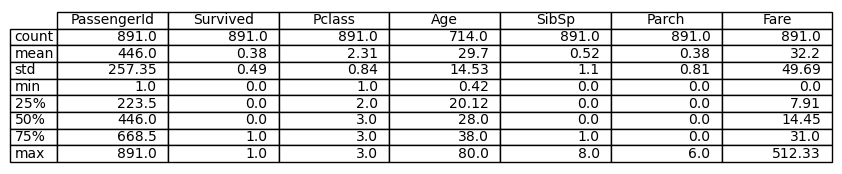

In [10]:
plt.figure(figsize=(10,2))
ax=plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax,data_train.describe().round(2), loc="center", rowLabels=['']*data_train.describe().shape[0])

plt.savefig("./figs/describe_train.png", bbox_inches='tight')

In [11]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


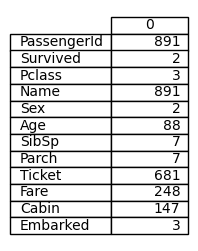

In [12]:
data_train.nunique()

plt.figure(figsize=(1,3))
ax=plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax,data_train.nunique(), loc="center", rowLabels=['']*data_train.shape[0])

plt.savefig("./figs/nunique_train.png", bbox_inches='tight')

In [13]:
data_train[(data_train.Ticket.duplicated())].head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S


In [14]:
data_train[(data_train.Ticket=='CA 2144')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


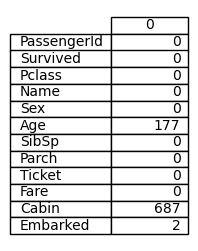

In [15]:
#corr=data_train.corr().round(3)
null_train=data_train.isnull().sum()
plt.figure(figsize=(1,3))
ax=plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax,null_train, loc="center", rowLabels=['']*null_train.shape[0]) #,colLabels="Null Values"

#pd.plotting.table(ax, null_train, rowLabels=None, colLabels=[['','coisas']])
plt.savefig("./figs/null_train.png", bbox_inches='tight')

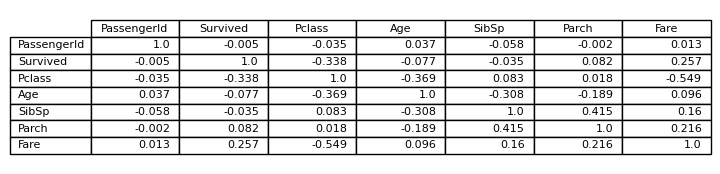

In [16]:
#Correlation beteew features
corr=data_train.corr().round(3)

plt.figure(figsize=(8,2))
ax=plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax,corr, loc="center", rowLabels=['']*corr.shape[0])
plt.savefig("./figs/correlation_table.png", bbox_inches='tight')

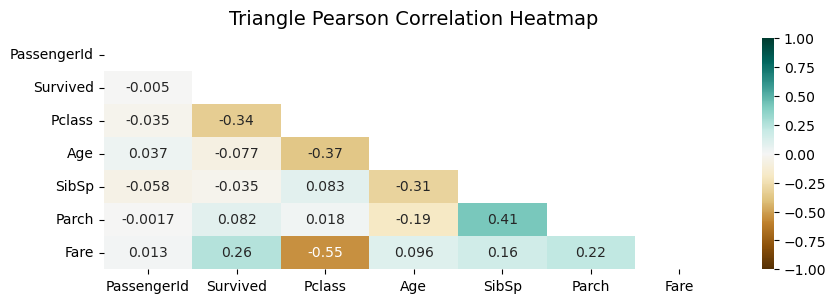

In [17]:
plt.figure(figsize=(10, 3))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_train.corr(), dtype=bool))
heatmap = sns.heatmap(data_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Pearson Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/init_corr_heat", bbox_inches='tight', dpi=600)

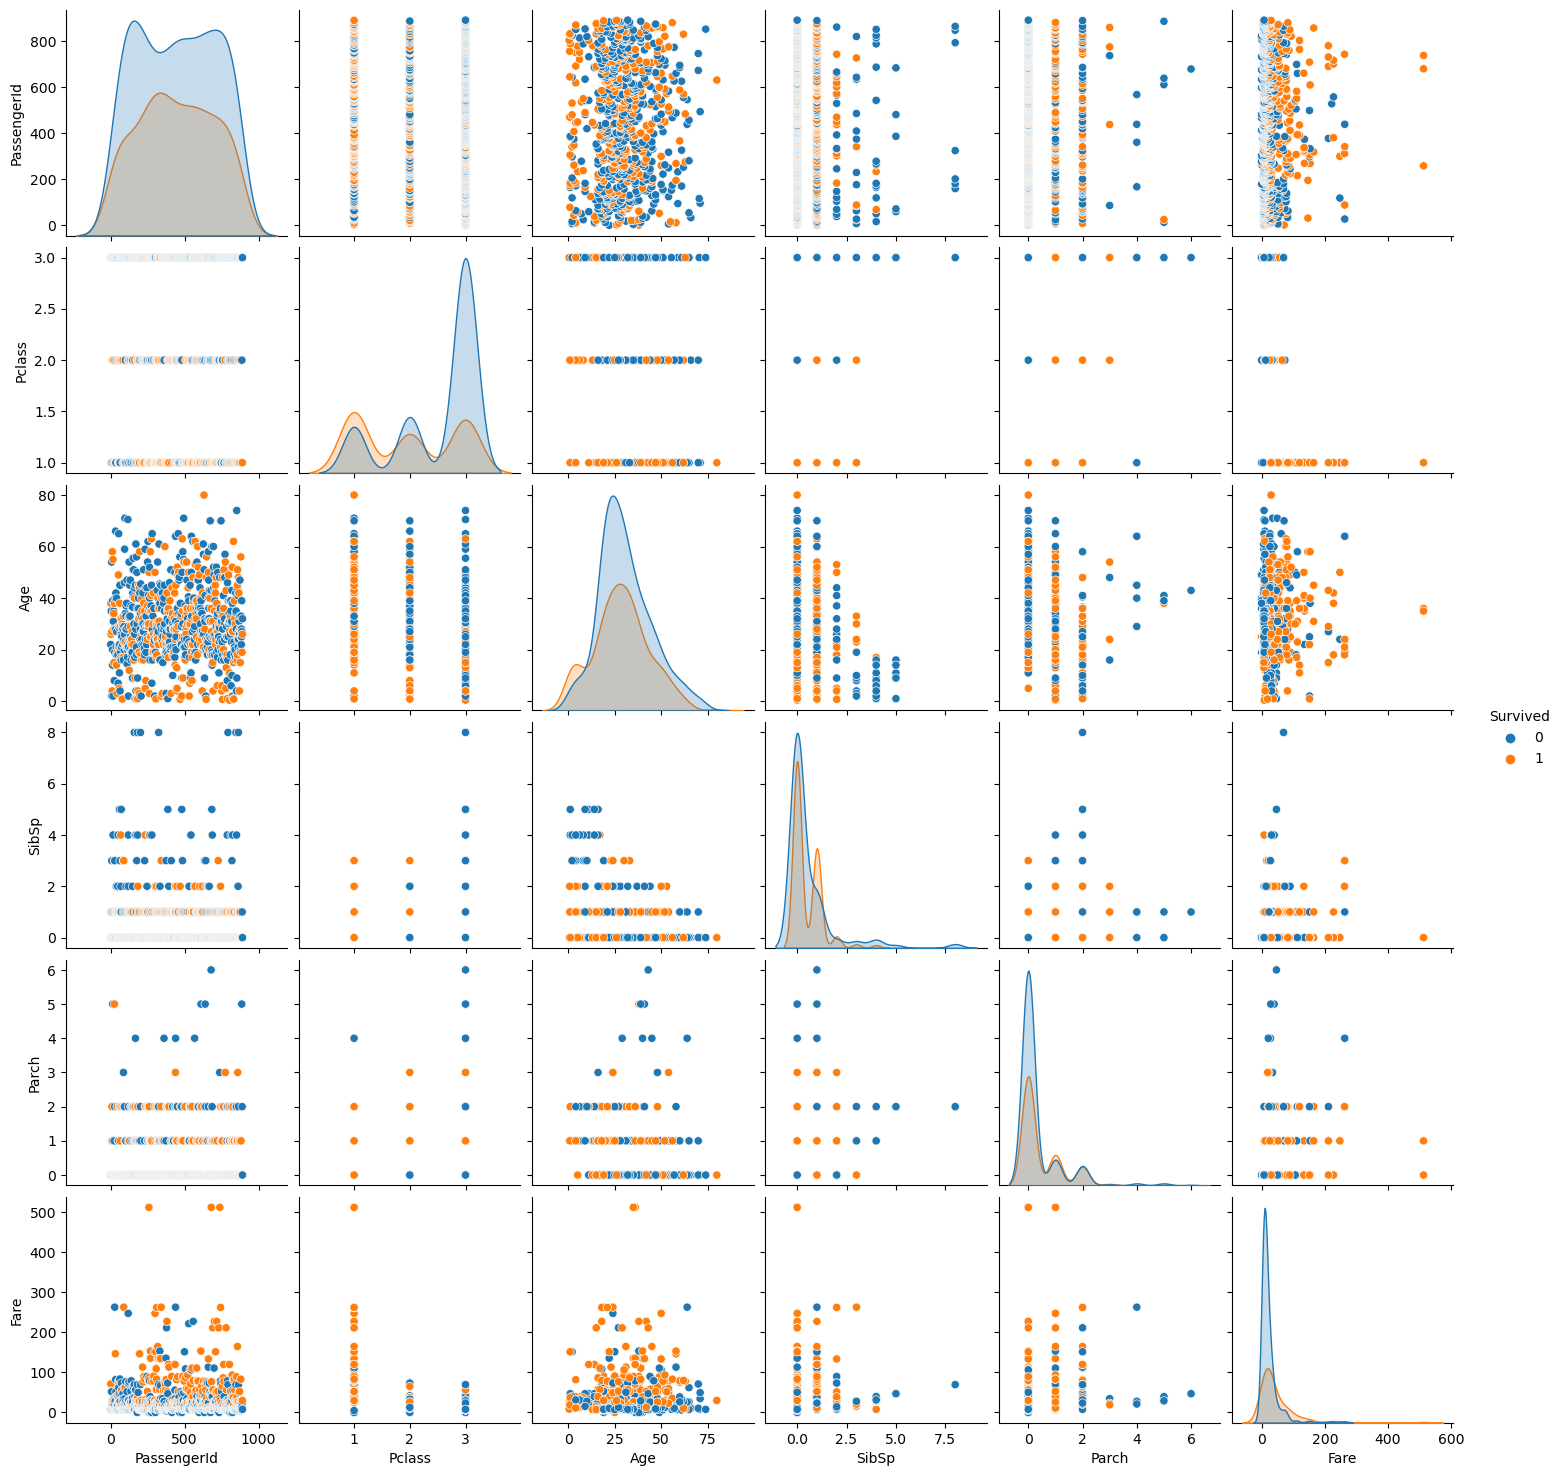

In [18]:
#sns.pairplot(data_train, hue="Survived");

pair_plot = sns.pairplot(data_train, hue="Survived");

pair_plot

pair_plot.savefig("./figs/survy_pair_plot_init.png", bbox_inches='tight', dpi=600)

<Figure size 2500x1500 with 0 Axes>

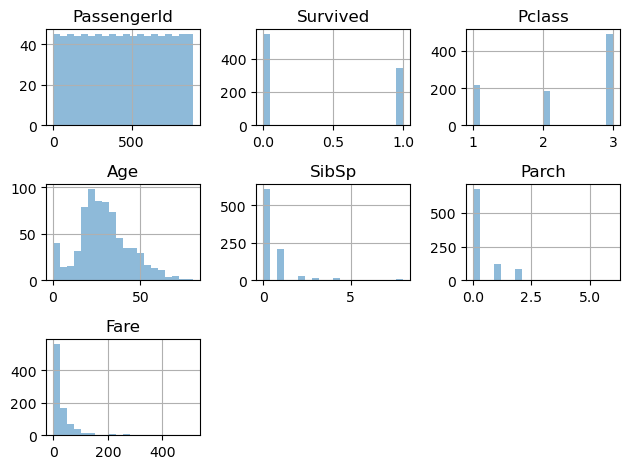

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(25,15))
data_train.hist(alpha=0.5,bins=20)
plt.tight_layout()
plt.show();

plt.savefig("./figs/dataset_hist.png");

# Check for missing data

In [20]:
#Check for empty data
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

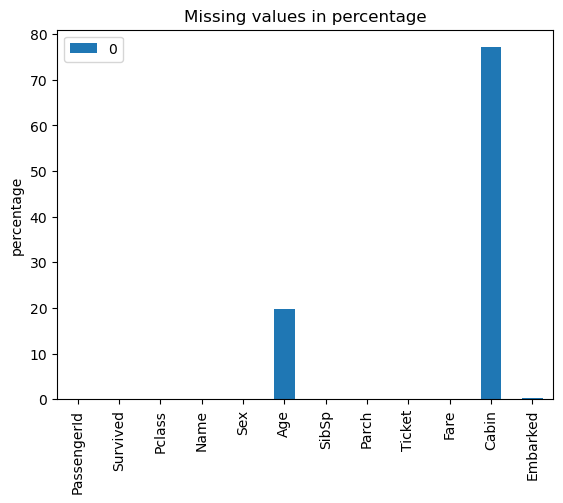

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [21]:
miss_vals = pd.DataFrame(data_train.isnull().sum() / len(data_train) * 100).round(2)
miss_vals.plot(kind='bar',
    title='Missing values in percentage',
    ylabel='percentage'
    )
 
plt.show()

miss_vals

## Treat missing data from lower number to higher

### Embarked

In [22]:
#Get Embarked data description
data_train.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [23]:
#Replace missing values by the most frequent value
data_train['Embarked']=data_train.Embarked.fillna(data_train['Embarked'].value_counts().idxmax())

#Check for Embarked empty data
data_train.Embarked.isnull().sum()

0

### Age

In [24]:
#Get Age data description
data_train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
#Analysis age in function to the class and gender
data_train.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [26]:
data_train.groupby(['Pclass','Sex'])['Age'].mean().round(2)

Pclass  Sex   
1       female    34.61
        male      41.28
2       female    28.72
        male      30.74
3       female    21.75
        male      26.51
Name: Age, dtype: float64

In [27]:
#Replace missing values by the median age in function of the class and gender
data_train['Age']=data_train.Age.fillna(data_train.groupby(['Pclass','Sex'])['Age'].transform('median'))

#Check for Age column empty data
data_train.Age.isnull().sum()

0

In [28]:
#Check for empty data
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
#Treat missing data
#Cabin
data_train.Cabin.isnull().sum()

687

In [30]:
data_train.Cabin.notnull().sum()

204

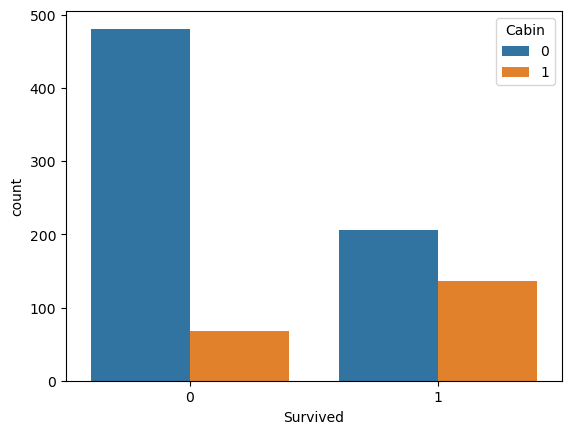

In [31]:
#Check some information about Survive having Cabin
#How to deal with this missing Cabin data?
#Because dataset was too missing data about cabin info, an idia to deal with that is to replace cabin 
#location by was cabin = 1, or not = 0
data_train['Cabin']=data_train['Cabin'].notnull().astype("int")

#Use graphic to make a quick inspect
sns.countplot(x = "Survived", hue = "Cabin", data= data_train);

In [32]:
#Recheck for empty data
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
#sns.pairplot(data_train, hue="Survived")

# Treat object data

In [34]:
#Drop columns Fare, Cabin, Name, Embarked and Ticket
data_train = data_train.drop(['PassengerId','Ticket','Name','Embarked','Cabin'],axis=1)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [35]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


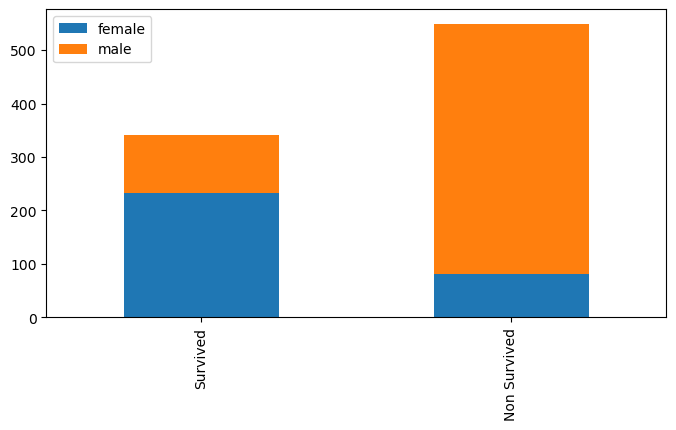

In [36]:
survived = data_train[data_train["Survived"]==1]["Sex"].value_counts()
dead = data_train[data_train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Non Survived"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4));

In [37]:
dummy = pd.get_dummies(data_train["Sex"])
data_train["Sex"] = dummy["female"]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [38]:
#sns.countplot(x = "Age", hue = "Embarked", data= data_train)
#sns.scatterplot(y=data_train["Age"],x=data_train["Survived"]).set_title("Survived by age")

#fig, ax = plt.subplots() 
#ax.hist(data_train['Age'][data_train.Survived == '0'], label='Not survived')
#ax.hist(data_train['Age'][data_train.Survived == '1'], label='Survived')
 
#plt.xlabel('Age')
#plt.ylabel('Survival')
#plt.title('Survivals by age')
#plt.legend()
#plt.show()


In [39]:
display(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,21.5,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


In [40]:
data_train.Sex.describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

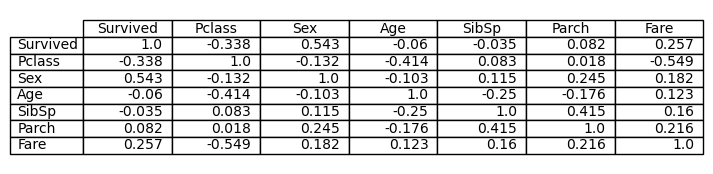

In [41]:
data_train.corr()

final_corr=data_train.corr().round(3)

plt.figure(figsize=(8,2))
ax=plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax,final_corr, loc="center", rowLabels=['']*final_corr.shape[0])

plt.savefig("./figs/final_corr_table.png", bbox_inches='tight')

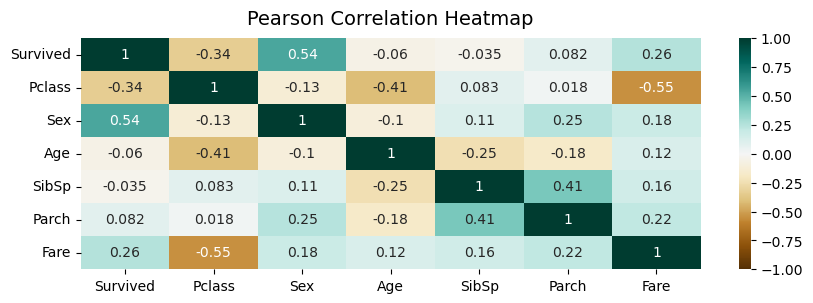

In [42]:
plt.figure(figsize=(10, 3))
heatmap = sns.heatmap(data_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Pearson Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/final_corr_heat", bbox_inches='tight', dpi=600)

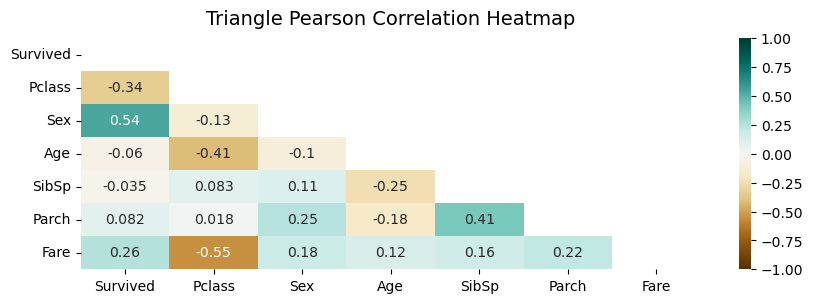

In [43]:
plt.figure(figsize=(10, 3))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_train.corr(), dtype=bool))
heatmap = sns.heatmap(data_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Pearson Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

How Fare and Ticket influences survival taxe?

Taking into account the correlation between the data of our samples, it can be verified that only Fare presents a correlation and it is with the Ticket Class.
To simplify the training sample these will be discarded

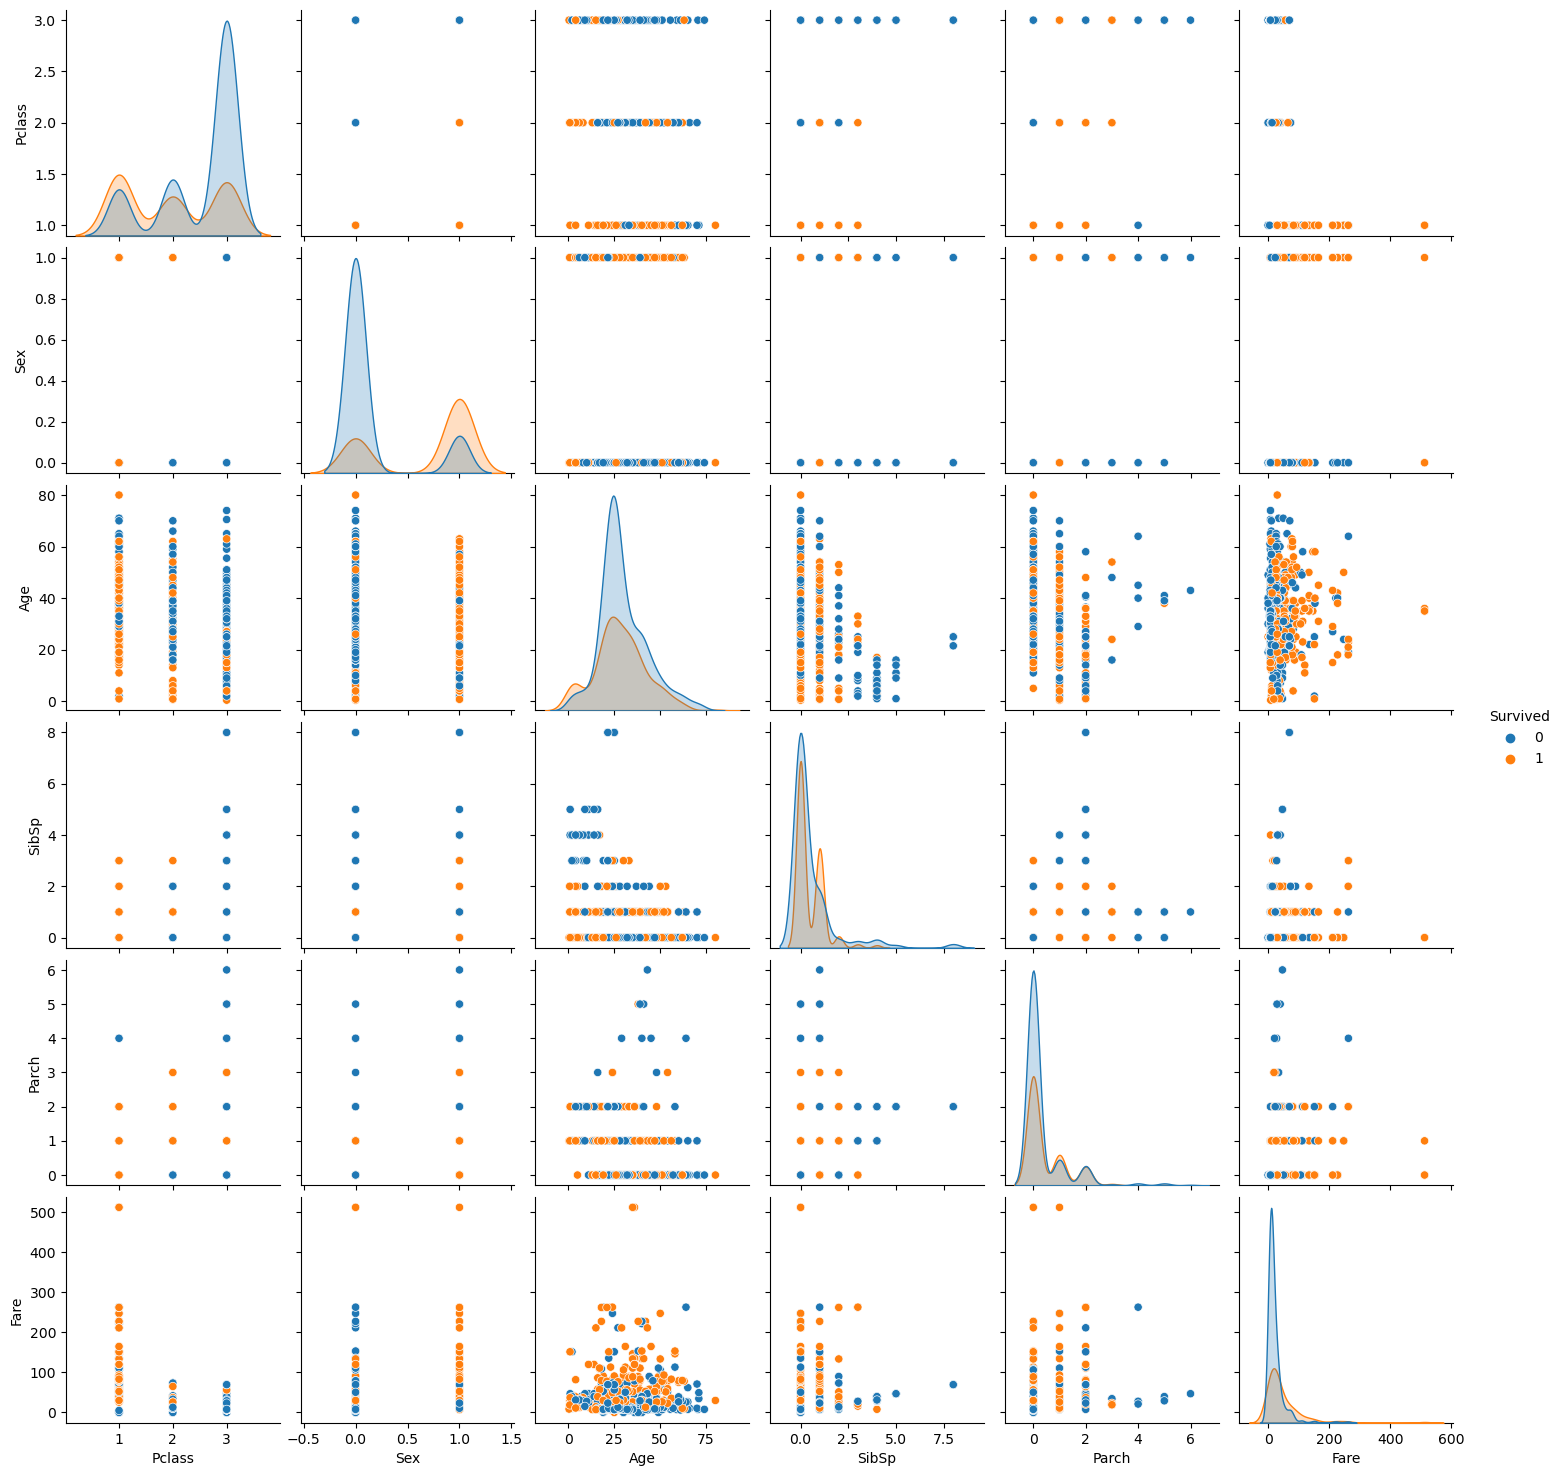

In [44]:
final_pair_plot = sns.pairplot(data_train, hue="Survived");
final_pair_plot

final_pair_plot.savefig("./figs/survy_pair_plot_final.png", bbox_inches='tight', dpi=600)

In [45]:
#See dataset info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [46]:
display(data_train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,21.5,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


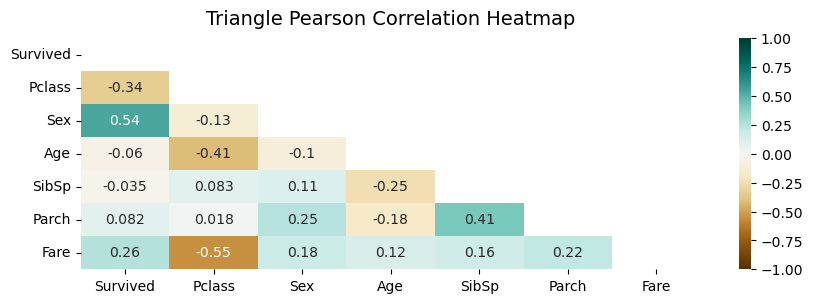

In [47]:
#Compare correlation between data again
plt.figure(figsize=(10, 3))
mask = np.triu(np.ones_like(data_train.corr(), dtype=bool))
heatmap = sns.heatmap(data_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Pearson Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/final_tri_corr_heat", bbox_inches='tight', dpi=600)

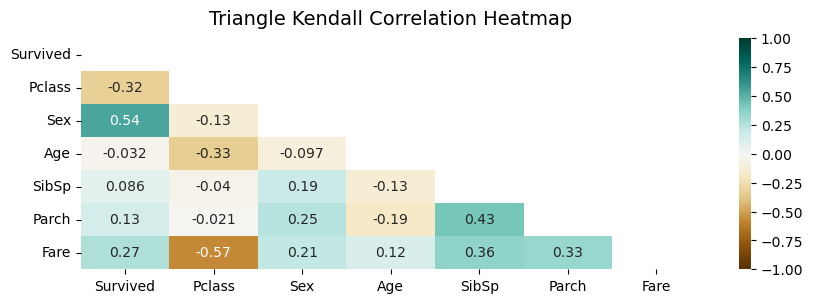

In [48]:
#Compare correlation between data again
plt.figure(figsize=(10, 3))
kendall_corr=data_train.corr(method='kendall')
mask = np.triu(np.ones_like(kendall_corr, dtype=bool))
heatmap = sns.heatmap(kendall_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Kendall Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/final_tri_corr_heat_kendall", bbox_inches='tight', dpi=600)

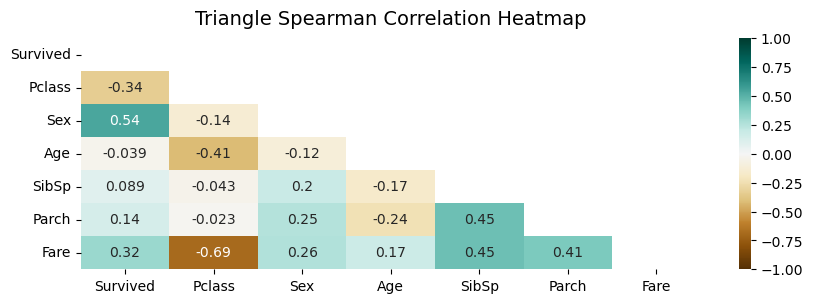

In [49]:
#Compare correlation between data again
plt.figure(figsize=(10, 3))
spearman_corr=data_train.corr(method='spearman')
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Spearman Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/final_tri_corr_heat_spearman", bbox_inches='tight', dpi=600)

<Figure size 2500x1500 with 0 Axes>

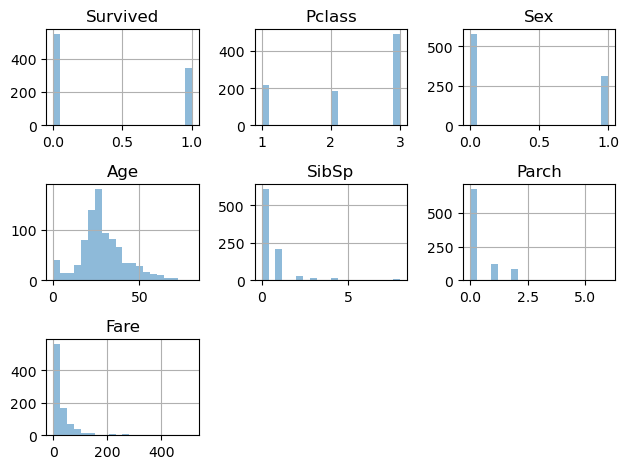

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize=(25,15))
data_train.hist(alpha=0.5,bins=20)
plt.tight_layout()
plt.show();

plt.savefig("./figs/final_dataset_hist.png");

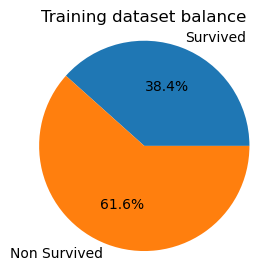

In [323]:
survived = data_train[data_train["Survived"]==1]["Survived"].count()
dead = data_train[data_train["Survived"]==0]["Survived"].count()

sizes= [survived, dead]

labels= ["Survived","Non Survived"]

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Training dataset balance')

plt.savefig("./figs/dataset_balance_.png",bbox_inches='tight', dpi=600)

plt.show();

In [51]:
X = data_train.drop('Survived',axis=1)
y = data_train.Survived
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_rest, y_rest, test_size=0.5, random_state=0)

In [52]:
display(X_train,y_train)

,Pclass,Sex,Age,SibSp,Parch,Fare
140,3,1,21.5,0,2,15.2458
439,2,0,31.0,0,0,10.5000
817,2,0,31.0,1,1,37.0042
378,3,0,20.0,0,0,4.0125
491,3,0,21.0,0,0,7.2500
...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583
192,3,1,19.0,1,0,7.8542
629,3,0,25.0,0,0,7.7333
559,3,1,36.0,1,0,17.4000


140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64

In [53]:
display(X_test, y_test)

,Pclass,Sex,Age,SibSp,Parch,Fare
887,1,1,19.0,0,0,30.0000
262,1,0,52.0,1,1,79.6500
808,2,0,39.0,0,0,13.0000
627,1,1,21.0,0,0,77.9583
535,2,1,7.0,0,2,26.2500
...,...,...,...,...,...,...
175,3,0,18.0,1,1,7.8542
848,2,0,28.0,0,1,33.0000
700,1,1,18.0,1,0,227.5250
311,1,1,18.0,2,2,262.3750


887    1
262    0
808    0
627    1
535    1
      ..
175    0
848    0
700    1
311    1
425    0
Name: Survived, Length: 89, dtype: int64

In [54]:
display(X_val, y_val)

,Pclass,Sex,Age,SibSp,Parch,Fare
40,3,1,40.0,1,0,9.4750
318,1,1,31.0,0,2,164.8667
103,3,0,33.0,0,0,8.6542
712,1,0,48.0,1,0,52.0000
37,3,0,21.0,0,0,8.0500
...,...,...,...,...,...,...
142,3,1,24.0,1,0,15.8500
815,1,0,40.0,0,0,0.0000
8,3,1,27.0,0,2,11.1333
822,1,0,38.0,0,0,0.0000


40     0
318    1
103    0
712    1
37     0
      ..
142    1
815    0
8      1
822    0
487    0
Name: Survived, Length: 90, dtype: int64

# Apply the same treatment as our train dataset

In [55]:
#Check test dataset
display(data_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [57]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


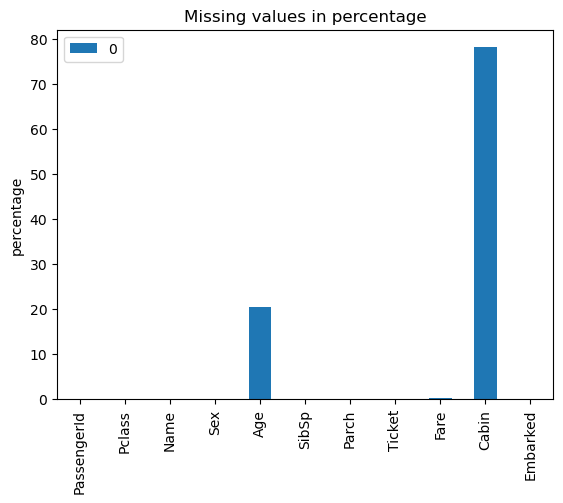

In [58]:
miss_vals_test = pd.DataFrame(data_test.isnull().sum() / len(data_test) * 100)
miss_vals_test.plot(kind='bar',
    title='Missing values in percentage',
    ylabel='percentage'
    )
 
plt.show()

In [59]:
#Drop the same columns
data_test = data_test.drop(['Ticket','Name','Embarked','PassengerId','Cabin'],axis=1)
display(data_test)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


## Deal null values

In [60]:
#Check for null values
data_test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

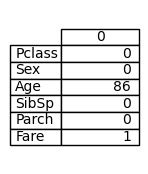

In [61]:
null_test=data_test.isnull().sum()
plt.figure(figsize=(1,2))
ax=plt.subplot(111,frame_on=False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
table(ax,null_test, loc="center", rowLabels=['']*null_test.shape[0]) #,colLabels="Null Values"

#pd.plotting.table(ax, null_train, rowLabels=None, colLabels=[['','coisas']])
plt.savefig("./figs/null_test.png", bbox_inches='tight')

In [62]:
data_test[data_test.Fare.isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare
152,3,male,60.5,0,0,NaN


In [63]:
data_test.groupby(data_test['Pclass'])['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500


In [64]:
data_test['Fare']=data_test.Fare.fillna(data_test.groupby('Pclass')['Fare'].transform('median'))

In [65]:
data_test.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       0
dtype: int64

In [66]:
#Anasys age in function to the class and gender
data_test.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    41.0
        male      42.0
2       female    24.0
        male      28.0
3       female    22.0
        male      24.0
Name: Age, dtype: float64

In [67]:
#Replace missing values by the median age in function of the class and gender
data_test['Age']=data_test.Age.fillna(data_test.groupby(['Pclass','Sex'])['Age'].transform('median'))

In [68]:
data_test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [69]:
#location by was cabin = 1, or not = 0
#data_test['Cabin']=data_test['Cabin'].notnull().astype("int")

In [70]:
data_test.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [71]:
display(data_test)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,24.0,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,24.0,0,0,8.0500


In [72]:
dummy = pd.get_dummies(data_test["Sex"])
data_test["Sex"] = dummy["female"]

In [73]:
data_test.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.108615,-0.534379,0.001087,0.018721,-0.577488
Sex,-0.108615,1.000000,-0.007134,0.099943,0.159120,0.192225
Age,-0.534379,-0.007134,1.000000,-0.080162,-0.058455,0.348014
SibSp,0.001087,0.099943,-0.080162,1.000000,0.306895,0.172031
Parch,0.018721,0.159120,-0.058455,0.306895,1.000000,0.230409
Fare,-0.577488,0.192225,0.348014,0.172031,0.230409,1.000000


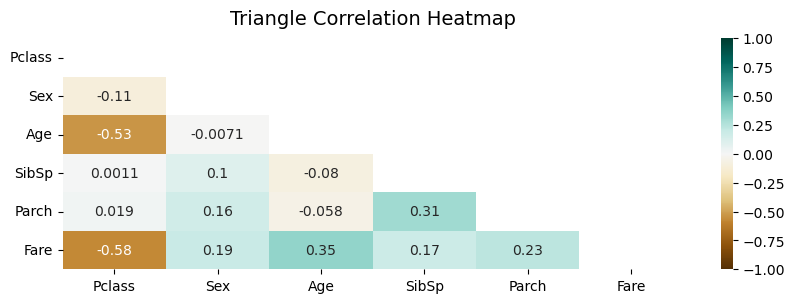

In [74]:
#Compare correlation between data test
plt.figure(figsize=(10, 3))
mask = np.triu(np.ones_like(data_test.corr(), dtype=bool))
heatmap = sns.heatmap(data_test.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/tri_corr_heat_optimized", bbox_inches='tight', dpi=600)

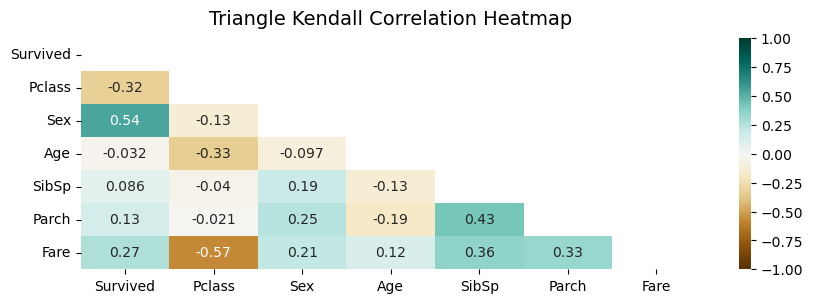

In [75]:
#Compare correlation between data test
plt.figure(figsize=(10, 3))
kendall_corr=data_train.corr(method='kendall')
mask = np.triu(np.ones_like(kendall_corr, dtype=bool))
heatmap = sns.heatmap(kendall_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Kendall Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/tri_corr_heat_optimized_kendall", bbox_inches='tight', dpi=600)

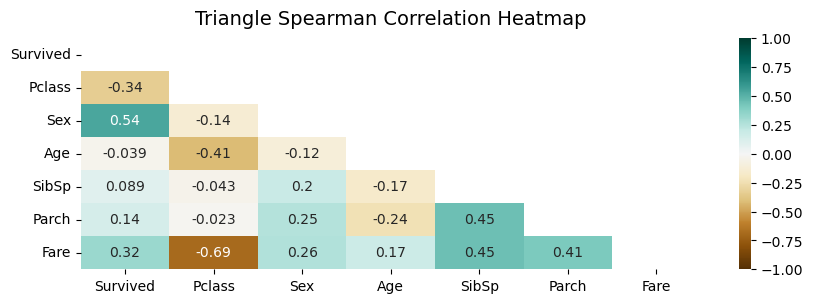

In [76]:
#Compare correlation between data test
plt.figure(figsize=(10, 3))
spearman_corr=data_train.corr(method='spearman')
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
heatmap = sns.heatmap(spearman_corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Spearman Correlation Heatmap', fontdict={'fontsize':14}, pad=10);

heatmap.get_figure().savefig("./figs/tri_corr_heat_optimized_spearman", bbox_inches='tight', dpi=600)

# Train

## KNN

In [282]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare
140       3    1  21.5      0      2  15.2458
439       2    0  31.0      0      0  10.5000
817       2    0  31.0      1      1  37.0042
378       3    0  20.0      0      0   4.0125
491       3    0  21.0      0      0   7.2500
..      ...  ...   ...    ...    ...      ...
835       1    1  39.0      1      1  83.1583
192       3    1  19.0      1      0   7.8542
629       3    0  25.0      0      0   7.7333
559       3    1  36.0      1      0  17.4000
684       2    0  60.0      1      1  39.0000

[712 rows x 6 columns]


In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [79]:
def getBestK(X, y, Xval, yval,Kn):
    
    acc = 0
    best_K=0
    
    for i in range(1, Kn):
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X, y)
        predKNN = neigh.predict(Xval)
        score = neigh.score(Xval, yval)
        if score>acc:
            acc =score
            best_K = i
    return best_K, acc

In [80]:
n=12
k1, v_score = getBestK(X_train, y_train, X_val, y_val, n)



print('Validation best score:',v_score)
print('K-Neighbirs:',k1)

Validation best score: 0.8
K-Neighbirs: 3


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [81]:
kNeigh = KNeighborsClassifier(n_neighbors=k1)
kNeigh.fit(X_train, y_train)
knnPred = kNeigh.predict(X_test)

print('Testing best score:',kNeigh.score(X_test, y_test).round(4)*100,'%')

Testing best score: 66.29 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

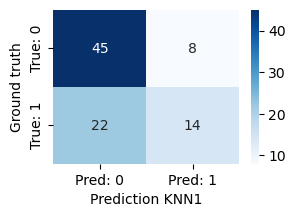

In [274]:
conf_mat_knn1 = confusion_matrix(y_test, knnPred)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_knn1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction KNN1')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_knn1.png", bbox_inches='tight')

In [83]:
print('Precision score:',precision_score(y_test,knnPred).round(4)*100,'%')

Precision score: 63.63999999999999 %


In [84]:
print('Recall:',recall_score(y_test, knnPred).round(4)*100,'%')

Recall: 38.89 %


## Support Vector Machines

In [85]:
from sklearn.svm import SVC

In [86]:
def getBestParams(X, y, Xval, yval,vals,kernels):
    
    acc = 0
    best_C=0
    best_gamma=0
    best_kernel=''
    
    for k in kernels:
        for i in vals:
            C= i
            for j in vals:
                gamma = 1/j
                classifier = SVC(C=C,gamma=gamma,kernel=k)
                classifier.fit(X,y)
                prediction = classifier.predict(Xval)
                score = classifier.score(Xval,yval)
                if score>acc:
                    acc =score
                    best_kernel = k
                    best_C =C
                    best_gamma=gamma
    return best_C, best_gamma, best_kernel, acc    

In [87]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 40, 50]
kernel_ops = ['linear','rbf', 'sigmoid'] 

c1, g1, ker1, v_score = getBestParams(X_train, y_train, X_val, y_val, vals, kernel_ops)

print('Validation best score:',v_score)
print('C:',c1)
print('gamma:',g1)
print('kernel:',ker1)

Validation best score: 0.7888888888888889
C: 30
gamma: 0.02
kernel: rbf


In [88]:
clfSVN = SVC(C=c1, kernel=ker1, gamma=g1)
clfSVN.fit(X_train, y_train)
predSVN = clfSVN.predict(X_test)

print('Testing best score:',clfSVN.score(X_test,y_test).round(4)*100,'%')

Testing best score: 70.78999999999999 %


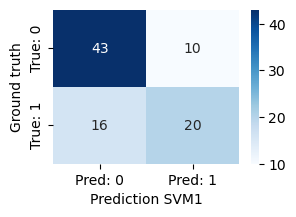

In [273]:
conf_mat_svm1 = confusion_matrix(y_test, predSVN)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_svm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction SVM1')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_svm1.png", bbox_inches='tight')

In [90]:
print('Precision score:',precision_score(y_test,predSVN).round(4)*100,'%')
print('Recall:',recall_score(y_test, predSVN).round(4)*100,'%')

Precision score: 66.67 %
Recall: 55.559999999999995 %


## Decision Tree

In [91]:
from sklearn import tree

In [92]:
def getBestTreeParams(X, y, Xval, yval, maxDepth, criterias, maxFeatures, r):
    
    acc=0
    best_d=0
    best_c = ''
    best_max = ''
    
    for d in range(1,maxDepth):
        for c in criterias:
            for m in maxFeatures:
                cTree = tree.DecisionTreeClassifier(max_depth=d, criterion=c, max_features=m, random_state=r)
                cTree = cTree.fit(X,y)
                treePred = cTree.predict(Xval)
                score = cTree.score(Xval,yval)
                if score>acc:
                    acc =score
                    best_d = d
                    best_c = c
                    best_max= m
    return best_d, best_c, best_max, acc    

In [93]:
maxDepth = 12
random = 20
criteria = ['gini', 'entropy']
max_featuresint = ['auto', 'sqrt', 'log2'] 


d1, crit1, max_f1, v_score = getBestTreeParams(X_train,y_train,X_val,y_val,maxDepth,criteria,max_featuresint,random)

print('Validation best score:',v_score)
print('Depth:',d1)
print('Criterion:',crit1)
print('Max Features:',max_f1)

Validation best score: 0.8666666666666667
Depth: 8
Criterion: entropy
Max Features: auto


In [94]:
clfTree = tree.DecisionTreeClassifier(max_depth=d1, criterion=crit1, max_features=max_f1,random_state=random)
clfTree = clfTree.fit(X_train,y_train)
predTree = clfTree.predict(X_test)

print('Testing best score:',clfTree.score(X_test,y_test).round(4)*100,'%')

Testing best score: 86.52 %


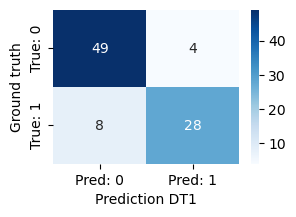

In [272]:
conf_mat_tree1 = confusion_matrix(y_test, predTree)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_tree1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction DT1')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_tree1.png", bbox_inches='tight')

In [96]:
print('Precision:',precision_score(y_test,predTree).round(4)*100,'%')
print('Recall:',recall_score(y_test, predTree).round(4)*100,'%')

Precision: 87.5 %
Recall: 77.78 %


## Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lbfgs - [‘l2’, None]

liblinear - [‘l1’, ‘l2’]

newton-cg - [‘l2’, None]

newton-cholesky - [‘l2’, None]

sag - [‘l2’, None]

saga - [‘elasticnet’, ‘l1’, ‘l2’, None]

In [98]:
def getBestRegParams(X, y, Xval, yval, m_iter, solver, r):

    p0 = ['elasticnet', 'l1', 'l2', 'none']
    p1 = ['l2','none']
    p2 = ['l1','l2']
    
    
    acc=0
    best_s=''
    best_p = ''
    best_max = 0
    
    for s in solver:
        
        if s=='saga':
            penalty=p0
        if s=='liblinear':
            penalty=p2
        else:
            penalty=p1
        #if s=='lbfgs':
        #    max_i = [5, 10, 25, 50, 75, 100]
        #else:
        max_i = m_iter
        for p in penalty:
            for i in max_i:
                #logReg = make_pipeline(StandardScaler(),LogisticRegression(random_state=r, solver=s,penalty=p,max_iter=i))
                logReg = LogisticRegression(random_state=r, solver=s,penalty=p,max_iter=i)             
                logReg = logReg.fit(X,y)              
                logPred = logReg.predict(Xval)
                score = logReg.score(Xval,yval)
                if score>acc:
                    acc =score
                    best_s = s
                    best_p = p
                    best_max= i
                    
    return best_s, best_p, best_max, acc  

In [99]:
max_iter = [50, 100, 150, 200, 250, 500, 1000]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

s1, p1, m_iter1, v_score = getBestRegParams(X_train,y_train, X_val, y_val, max_iter, solver, random)

print('Validation best score:',v_score)
print('Solver:',s1)
print('Penalty:',p1)
print('Max iteractions:',m_iter1)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Validation best score: 0.7666666666666667
Solver: sag
Penalty: l2
Max iteractions: 1000


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [100]:
clfLogReg = LogisticRegression(random_state=random,solver=s1,penalty=p1,max_iter=m_iter1)
clfLogReg.fit(X_train, y_train)
predLogReg=clfLogReg.predict(X_test)

print('Testing best score:',clfLogReg.score(X_test,y_test).round(4)*100,'%')

Testing best score: 79.78 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


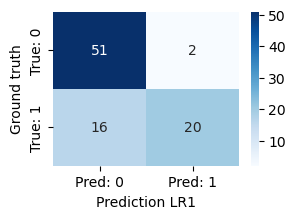

In [277]:
conf_mat_log1 = confusion_matrix(y_test, predLogReg)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_log1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction LR1')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_log1.png", bbox_inches='tight')

In [102]:
print('Precision score:',precision_score(y_test,predLogReg).round(4)*100,'%')
print('Recall:',recall_score(y_test, predLogReg).round(4)*100,'%')

Precision score: 90.91 %
Recall: 55.559999999999995 %


## Random Forests

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
def getRandomForestsParams(X, y, Xval, yval,maxDepth,criterias,maxFeatures,nEstimators,r):
    
    acc=0
    best_d=0
    best_c = ''
    best_max = ''
    best_estimator =0
    
    for d in range(1,maxDepth):
        for c in criterias:
            for m in maxFeatures:
                for n in nEstimators:
                    cRF = RandomForestClassifier(max_depth=d, criterion=c, max_features=m,n_estimators=n, random_state=r)
                    cRF = cRF.fit(X,y)
                    predRF = cRF.predict(Xval)
                    score = cRF.score(Xval,yval)
                    if score>acc:
                        acc =score
                        best_d = d
                        best_c = c
                        best_max= m
                        best_estimator=n
    return best_d, best_c, best_max, best_estimator, acc  

In [105]:
n_estim = [50, 100, 150, 200, 250, 500, 1000]

rf_d1,rf_crit1,rf_max_f1,est1,v_score = getRandomForestsParams(X_train,y_train,X_val,y_val,maxDepth,criteria,max_featuresint,n_estim,random)

print('Validation best score:',v_score)
print('Depth:',rf_d1)
print('Criterion:',rf_crit1)
print('Max features:',rf_max_f1)
print('Estimators:',est1)

Validation best score: 0.8444444444444444
Depth: 9
Criterion: gini
Max features: auto
Estimators: 100


In [106]:
clfRF = RandomForestClassifier(max_depth=rf_d1, criterion=rf_crit1, max_features=rf_max_f1,n_estimators=est1,random_state=random)
clfRF = clfRF.fit(X_train,y_train)
predRF = clfRF.predict(X_test)

print('Tresting best score =',clfRF.score(X_test,y_test).round(4)*100,'%')

Tresting best score = 86.52 %


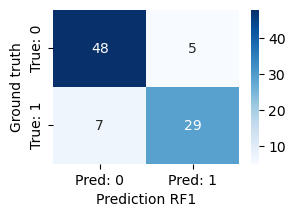

In [270]:
conf_mat_rf1 = confusion_matrix(y_test, predRF)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_rf1, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction RF1')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_rf1.png", bbox_inches='tight')

In [108]:
print('Precision score:',precision_score(y_test,predRF).round(4)*100,'%')
print('Recall:',recall_score(y_test, predRF).round(4)*100,'%')

Precision score: 85.28999999999999 %
Recall: 80.56 %


## Drop features SibSp and Parch

In [109]:
display(X_train)

,Pclass,Sex,Age,SibSp,Parch,Fare
140,3,1,21.5,0,2,15.2458
439,2,0,31.0,0,0,10.5000
817,2,0,31.0,1,1,37.0042
378,3,0,20.0,0,0,4.0125
491,3,0,21.0,0,0,7.2500
...,...,...,...,...,...,...
835,1,1,39.0,1,1,83.1583
192,3,1,19.0,1,0,7.8542
629,3,0,25.0,0,0,7.7333
559,3,1,36.0,1,0,17.4000


In [283]:
X_train2 = X_train.drop(['SibSp','Parch'],axis=1)
X_test2 = X_test.drop(['SibSp','Parch'],axis=1)
X_val2 = X_val.drop(['SibSp','Parch'],axis=1)
#display(X_train2, X_test2, X_val2)

     Pclass  Sex   Age     Fare
140       3    1  21.5  15.2458
439       2    0  31.0  10.5000
817       2    0  31.0  37.0042
378       3    0  20.0   4.0125
491       3    0  21.0   7.2500
..      ...  ...   ...      ...
835       1    1  39.0  83.1583
192       3    1  19.0   7.8542
629       3    0  25.0   7.7333
559       3    1  36.0  17.4000
684       2    0  60.0  39.0000

[712 rows x 4 columns]


In [ ]:
print(X_train2)

## Repeat train

### KNN

In [111]:
k2, v_score = getBestK(X_train2, y_train, X_val2, y_val, n)

print('Validation best score:',v_score)
print('K-Neighbirs:',k2)

Validation best score: 0.7888888888888889
K-Neighbirs: 3


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [112]:
kNeigh2 = KNeighborsClassifier(n_neighbors=k2)
kNeigh2.fit(X_train, y_train)
knnPred2 = kNeigh2.predict(X_test)
print('Testing best score is =',kNeigh2.score(X_test, y_test).round(4)*100,'%')

Testing best score is = 66.29 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

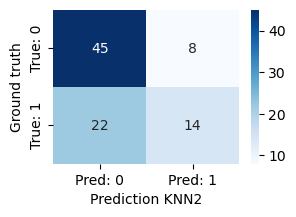

In [269]:
conf_mat_knn2 = confusion_matrix(y_test, knnPred2)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_knn2, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction KNN2')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_knn2.png", bbox_inches='tight')

In [114]:
print('Precision score:',precision_score(y_test,knnPred2).round(4)*100,'%')
print('Recall:',recall_score(y_test, knnPred2).round(4)*100,'%')

Precision score: 63.63999999999999 %
Recall: 38.89 %


### Support Vector Machines

In [115]:
best_C, best_gamma, best_kernel, v_score = getBestParams(X_train2, y_train, X_val2, y_val, vals, kernel_ops)

print('Validation best score:',v_score)
print('C:',best_C)
print('gamma:',best_gamma)
print('kernel:',best_kernel)

Validation best score: 0.7888888888888889
C: 10
gamma: 0.025
kernel: rbf


In [116]:
clfSVN2 = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
clfSVN2.fit(X_train2, y_train)
predSVN2 = clfSVN2.predict(X_test2)

print('Testing best score:',clfSVN2.score(X_test2,y_test).round(4)*100,'%')

Testing best score: 75.28 %


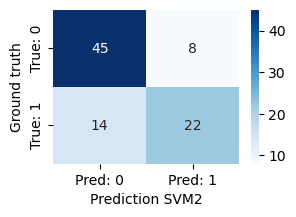

In [268]:
conf_mat_svm2 = confusion_matrix(y_test, predSVN2)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_svm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction SVM2')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_svm2.png", bbox_inches='tight')

In [118]:
print('Precision score:',precision_score(y_test,predSVN2).round(4)*100,'%')
print('Recall:',recall_score(y_test, predSVN2).round(4)*100,'%')

Precision score: 73.33 %
Recall: 61.11 %


### Decision Tree

In [119]:
d2,crit2,max_f2,v_score = getBestTreeParams(X_train2,y_train,X_val2,y_val,maxDepth,criteria,max_featuresint,random)

print('Validation best score:',v_score)
print('Depth:',d2)
print('Criterion:',crit2)
print('Max Features:',max_f2)

Validation best score: 0.8
Depth: 8
Criterion: gini
Max Features: auto


In [120]:
clfTree2 = tree.DecisionTreeClassifier(max_depth=d2, criterion=crit2, max_features=max_f2,random_state=random)
clfTree2 = clfTree2.fit(X_train2,y_train)
predTree2 = clfTree2.predict(X_test2)

print('Testing best score:',clfTree2.score(X_test2,y_test).round(4)*100,'%')

Testing best score: 87.64 %


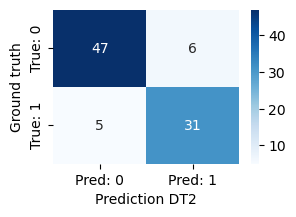

In [267]:
conf_mat_tree2 = confusion_matrix(y_test, predTree2)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_tree2, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction DT2')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_tree2.png", bbox_inches='tight')

In [122]:
print('Precision score:',precision_score(y_test,predTree2).round(4)*100,'%')
print('Recall:',recall_score(y_test, predTree2).round(4)*100,'%')

Precision score: 83.78 %
Recall: 86.11 %


### Logistic Regression

In [123]:
s2, p2, m_iter2, v_score = getBestRegParams(X_train2,y_train, X_val2, y_val, max_iter, solver, random)

print('Validation best score:',v_score)
print('Solver:',s2)
print('Penalty:',p2)
print('Max iteractions:',m_iter2)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Validation best score: 0.7777777777777778
Solver: lbfgs
Penalty: none
Max iteractions: 50


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [124]:
clfLogReg2 = LogisticRegression(random_state=random,solver=s2,penalty=p2,max_iter=m_iter2)
clfLogReg2.fit(X_train2, y_train)
predLogReg2=clfLogReg2.predict(X_test2)

print('Testing best score:',clfLogReg2.score(X_test2,y_test).round(4)*100,'%')

Testing best score: 82.02000000000001 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


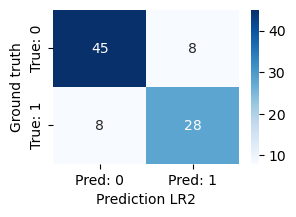

In [266]:
conf_mat_log2 = confusion_matrix(y_test, predLogReg2)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_log2, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction LR2')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_log2.png", bbox_inches='tight')

In [126]:
print('Precision score:',precision_score(y_test,predLogReg2).round(4)*100,'%')
print('Recall:',recall_score(y_test, predLogReg2).round(4)*100,'%')

Precision score: 77.78 %
Recall: 77.78 %


## Random Forests

In [127]:
rf_d2,rf_crit2,rf_max_f2,est2,v_score = getRandomForestsParams(X_train2,y_train, X_test2, y_test,maxDepth,criteria,max_featuresint,n_estim,random)

print('Validation best score:',v_score)
print('Depth:',rf_d2)
print('Criterion:',rf_crit2)
print('Max features:',rf_max_f2)
print('Estimators:',est2)

Validation best score: 0.8876404494382022
Depth: 10
Criterion: gini
Max features: auto
Estimators: 50


In [128]:
clfRF2 = RandomForestClassifier(max_depth=rf_d2, criterion=rf_crit2, max_features=rf_max_f2,n_estimators=est2,random_state=random)
clfRF2 = clfRF2.fit(X_train2,y_train)
predRF2 = clfRF2.predict(X_test2)

print('Training best score =',clfRF2.score(X_test2,y_test).round(4)*100,'%')

Training best score = 88.75999999999999 %


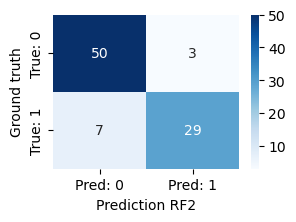

In [265]:
conf_mat_rf2 = confusion_matrix(y_test, predRF2)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_rf2, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction RF2')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_rf2.png", bbox_inches='tight')

In [130]:
print('Precision score:',precision_score(y_test,predRF2).round(4)*100,'%')
print('Recall:',recall_score(y_test, predRF2).round(4)*100,'%')

Precision score: 90.62 %
Recall: 80.56 %


### Drop other Fare value

In [131]:
X_train3 = X_train.drop(['Fare'],axis=1)
X_test3 = X_test.drop(['Fare'],axis=1)
X_val3 = X_val.drop(['Fare'],axis=1)
#display(X_train3, X_test3, X_val3)

,Pclass,Sex,Age,SibSp,Parch
140,3,1,21.5,0,2
439,2,0,31.0,0,0
817,2,0,31.0,1,1
378,3,0,20.0,0,0
491,3,0,21.0,0,0
...,...,...,...,...,...
835,1,1,39.0,1,1
192,3,1,19.0,1,0
629,3,0,25.0,0,0
559,3,1,36.0,1,0


,Pclass,Sex,Age,SibSp,Parch
887,1,1,19.0,0,0
262,1,0,52.0,1,1
808,2,0,39.0,0,0
627,1,1,21.0,0,0
535,2,1,7.0,0,2
...,...,...,...,...,...
175,3,0,18.0,1,1
848,2,0,28.0,0,1
700,1,1,18.0,1,0
311,1,1,18.0,2,2


,Pclass,Sex,Age,SibSp,Parch
40,3,1,40.0,1,0
318,1,1,31.0,0,2
103,3,0,33.0,0,0
712,1,0,48.0,1,0
37,3,0,21.0,0,0
...,...,...,...,...,...
142,3,1,24.0,1,0
815,1,0,40.0,0,0
8,3,1,27.0,0,2
822,1,0,38.0,0,0


In [284]:
print(X_train3)

     Pclass  Sex   Age  SibSp  Parch
140       3    1  21.5      0      2
439       2    0  31.0      0      0
817       2    0  31.0      1      1
378       3    0  20.0      0      0
491       3    0  21.0      0      0
..      ...  ...   ...    ...    ...
835       1    1  39.0      1      1
192       3    1  19.0      1      0
629       3    0  25.0      0      0
559       3    1  36.0      1      0
684       2    0  60.0      1      1

[712 rows x 5 columns]


In [132]:
k3, v_score = getBestK(X_train3, y_train, X_val3, y_val, n)

print('Validation best score:',v_score)
print('K-Neighbirs:',k3)

Validation best score: 0.8111111111111111
K-Neighbirs: 9


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [133]:
neigh3 = KNeighborsClassifier(n_neighbors=k3)
neigh3.fit(X_train3, y_train)
predKNN3 = neigh3.predict(X_test3)

print('Testing best score:',neigh3.score(X_test3, y_test).round(4)*100,'%')

Testing best score: 78.64999999999999 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

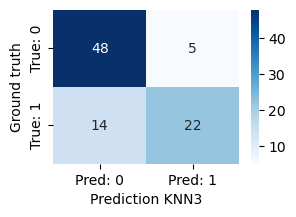

In [264]:
conf_mat_knn3 = confusion_matrix(y_test, predKNN3)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_knn3, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction KNN3')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_knn3.png", bbox_inches='tight')

In [135]:
print('Precision score:',precision_score(y_test,predKNN3).round(4)*100,'%')
print('Recall:',recall_score(y_test, predKNN3).round(4)*100,'%')

Precision score: 81.47999999999999 %
Recall: 61.11 %


In [136]:
c3, g3, ker3, v_score = getBestParams(X_train3, y_train, X_val3, y_val, vals, kernel_ops)

print('Validation best score:',v_score)
print('C:',c3)
print('gamma:',g3)
print('kernel:',ker3)

Validation best score: 0.8111111111111111
C: 3
gamma: 0.3333333333333333
kernel: rbf


In [137]:
clfSVN3 =  SVC(C=c3, kernel=ker3, gamma=g3)
clfSVN3.fit(X_train3, y_train)
predSVN3 = clfSVN3.predict(X_test3)

print('Testing best score:',clfSVN3.score(X_test3,y_test).round(4)*100,'%')

Testing best score: 80.9 %


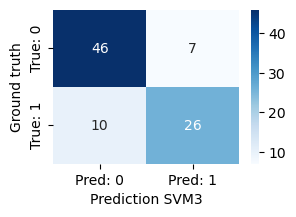

In [263]:
conf_mat_svm3 = confusion_matrix(y_test, predSVN3)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_svm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction SVM3')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_svm3.png", bbox_inches='tight')

In [139]:
print('Precision score:',precision_score(y_test,predSVN3).round(4)*100,'%')
print('Recall:',recall_score(y_test, predSVN3).round(4)*100,'%')

Precision score: 78.79 %
Recall: 72.22 %


In [140]:
d3,crit3,max_f3,v_score = getBestTreeParams(X_train3,y_train,X_val3,y_val,maxDepth,criteria,max_featuresint,random)

print('Validation best score:',v_score)
print('Depth:',d3)
print('Criterion:',crit3)
print('Max Features:',max_f3)

Validation best score: 0.8
Depth: 11
Criterion: gini
Max Features: auto


In [141]:
clfTree3 = tree.DecisionTreeClassifier(max_depth=d3, criterion=crit3, max_features=max_f3,random_state=random)
clfTree3 = clfTree3.fit(X_train3,y_train)
predTree3 = clfTree3.predict(X_test3)

print('Testing best score:',clfTree3.score(X_test3,y_test).round(4)*100,'%')

Testing best score: 80.9 %


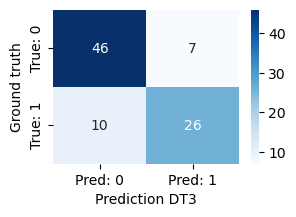

In [262]:
conf_mat_tree3 = confusion_matrix(y_test, predTree3)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_tree3, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction DT3')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_tree3.png", bbox_inches='tight')

In [143]:
print('Precision score:',precision_score(y_test,predTree3).round(4)*100,'%')
print('Recall:',recall_score(y_test, predTree3).round(4)*100,'%')

Precision score: 78.79 %
Recall: 72.22 %


In [144]:
s3, p3, m_iter3, v_score = getBestRegParams(X_train3,y_train, X_val3, y_val, max_iter, solver, random)

print('Validation best score:',v_score)
print('Solver:',s3)
print('Penalty:',p3)
print('Max iteractions:',m_iter3)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Validation best score: 0.7777777777777778
Solver: saga
Penalty: l2
Max iteractions: 50


In [145]:
clfLogReg3 = LogisticRegression(random_state=random,solver=s3,penalty=p3,max_iter=m_iter3)
clfLogReg3.fit(X_train3, y_train)
predLogReg3=clfLogReg3.predict(X_test3)

print('Testing best score:',clfLogReg3.score(X_test3,y_test).round(4)*100,'%')

Testing best score: 83.15 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


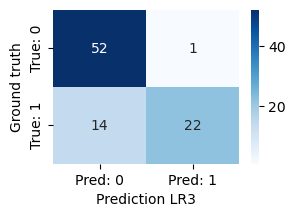

In [261]:
conf_mat_log3 = confusion_matrix(y_test, predLogReg3)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_log3, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction LR3')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_log3.png", bbox_inches='tight')

In [147]:
print('Precision score:',precision_score(y_test,predLogReg3).round(4)*100,'%')
print('Recall:',recall_score(y_test, predLogReg3).round(4)*100,'%')

Precision score: 95.65 %
Recall: 61.11 %


In [148]:
rf_d3,rf_crit3,rf_max_f3,est3,v_score = getRandomForestsParams(X_train3,y_train,X_val3,y_val,maxDepth,criteria,max_featuresint,n_estim,random)

print('Validation best score:',v_score)
print('Depth:',rf_d3)
print('Criterion:',rf_crit3)
print('Max features:',rf_max_f3)
print('Estimators:',est3)

Validation best score: 0.8222222222222222
Depth: 10
Criterion: entropy
Max features: auto
Estimators: 200


In [149]:
clfRF3 = RandomForestClassifier(max_depth=rf_d3, criterion=rf_crit3, max_features=rf_max_f3,n_estimators=est3,random_state=random)
clfRF3 = clfRF3.fit(X_train3,y_train)
predRF3 = clfRF3.predict(X_test3)

print('Training best score =',clfRF3.score(X_test3,y_test).round(4)*100,'%')

Training best score = 85.39 %


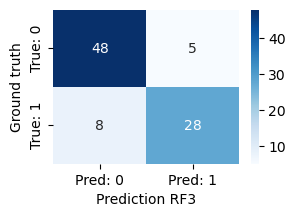

In [260]:
conf_mat_rf3 = confusion_matrix(y_test, predRF3)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_rf3, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction RF3')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_rf3.png", bbox_inches='tight')

In [151]:
print('Precision score:',precision_score(y_test,predRF3).round(4)*100,'%')
print('Recall:',recall_score(y_test, predRF3).round(4)*100,'%')

Precision score: 84.85000000000001 %
Recall: 77.78 %


## Drop features Fare, SibSp and Parch

In [152]:
X_train4 = X_train.drop(['SibSp','Parch','Fare'],axis=1)
X_test4 = X_test.drop(['SibSp','Parch','Fare'],axis=1)
X_val4 = X_val.drop(['SibSp','Parch','Fare'],axis=1)
#display(X_train4, X_test4)

,Pclass,Sex,Age
140,3,1,21.5
439,2,0,31.0
817,2,0,31.0
378,3,0,20.0
491,3,0,21.0
...,...,...,...
835,1,1,39.0
192,3,1,19.0
629,3,0,25.0
559,3,1,36.0


,Pclass,Sex,Age
887,1,1,19.0
262,1,0,52.0
808,2,0,39.0
627,1,1,21.0
535,2,1,7.0
...,...,...,...
175,3,0,18.0
848,2,0,28.0
700,1,1,18.0
311,1,1,18.0


In [285]:
print(X_train4)

     Pclass  Sex   Age
140       3    1  21.5
439       2    0  31.0
817       2    0  31.0
378       3    0  20.0
491       3    0  21.0
..      ...  ...   ...
835       1    1  39.0
192       3    1  19.0
629       3    0  25.0
559       3    1  36.0
684       2    0  60.0

[712 rows x 3 columns]


In [153]:
k4,v_score = getBestK(X_train4, y_train, X_val4, y_val, n)

print('Validation best score:',v_score)
print('K-Neighbirs:',k4)

Validation best score: 0.8
K-Neighbirs: 10


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [154]:
neigh4 = KNeighborsClassifier(n_neighbors=k4)
neigh4.fit(X_train4, y_train)
predKNN4 = neigh4.predict(X_test4)

print('Testing best score:',neigh4.score(X_test4, y_test).round(4)*100,'%')

Testing best score: 76.4 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

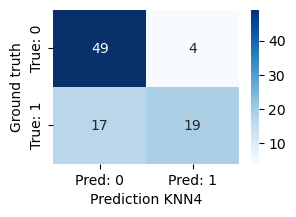

In [259]:
conf_mat_knn4 = confusion_matrix(y_test, predKNN4)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_knn4, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction KNN4')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_knn4.png", bbox_inches='tight')

In [156]:
print('Precision score:',precision_score(y_test,predKNN4).round(4)*100,'%')
print('Recall:',recall_score(y_test, predKNN4).round(4)*100,'%')

Precision score: 82.61 %
Recall: 52.78 %


In [157]:
c4,g4,ker4,v_score = getBestParams(X_train4, y_train, X_val4, y_val, vals, kernel_ops)

print('Validation best score:',v_score)
print('C:',c4)
print('gamma:',g4)
print('kernel:',ker4)


Validation best score: 0.8222222222222222
C: 30
gamma: 0.3333333333333333
kernel: rbf


In [158]:
clfSVN4 =  SVC(C=c4, kernel=ker4, gamma=g4)
clfSVN4.fit(X_train4, y_train)
predSVN4 = clfSVN4.predict(X_test4)

print('Testing best score:',clfSVN4.score(X_test4,y_test).round(4)*100,'%')

Testing best score: 84.27 %


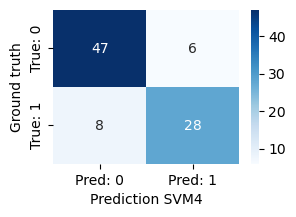

In [258]:
conf_mat_svm4 = confusion_matrix(y_test, predSVN4)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_svm4, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction SVM4')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_svm4.png", bbox_inches='tight')

In [160]:
print('Precision score:',precision_score(y_test,predSVN4).round(4)*100,'%')
print('Recall:',recall_score(y_test, predSVN4).round(4)*100,'%')

Precision score: 82.35 %
Recall: 77.78 %


In [161]:
d4,crit4,max_f4,v_score = getBestTreeParams(X_train4,y_train,X_val4,y_val,maxDepth,criteria,max_featuresint,random)

print('Validation best score:',v_score)
print('Depth:',d4)
print('Criterion:',crit4)
print('Max Features:',max_f4)

Validation best score: 0.8222222222222222
Depth: 8
Criterion: gini
Max Features: auto


In [162]:
clfTree4 = tree.DecisionTreeClassifier(max_depth=d4, criterion=crit4, max_features=max_f4,random_state=random)
clfTree4 = clfTree4.fit(X_train4,y_train)
predTree4 = clfTree4.predict(X_test4)

print('Testing best score:',clfTree4.score(X_test4,y_test).round(4)*100,'%')

Testing best score: 84.27 %


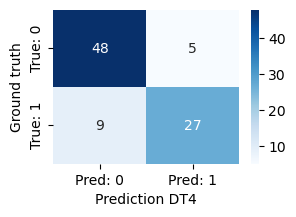

In [257]:
conf_mat_tree4 = confusion_matrix(y_test, predTree4)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_tree4, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction DT4')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_tree4.png", bbox_inches='tight')

In [164]:
print('Precision score:',precision_score(y_test,predTree4).round(4)*100,'%')
print('Recall:',recall_score(y_test, predTree4).round(4)*100,'%')

Precision score: 84.38 %
Recall: 75.0 %


In [165]:
s4, p4, m_iter4, v_score = getBestRegParams(X_train4,y_train, X_val4, y_val, max_iter, solver, random)

print('Validation best score:',v_score)
print('Solver:',s4)
print('Penalty:',p4)
print('Max iteractions:',m_iter4)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Validation best score: 0.7888888888888889
Solver: saga
Penalty: l2
Max iteractions: 50


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [166]:
clfLogReg4 = LogisticRegression(random_state=random,solver=s4,penalty=p4,max_iter=m_iter4)
clfLogReg4.fit(X_train4, y_train)
predLogReg4=clfLogReg4.predict(X_test4)

print('Testing best score:',clfLogReg4.score(X_test4,y_test).round(4)*100,'%')

Testing best score: 84.27 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


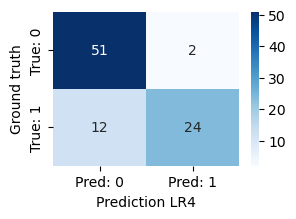

In [256]:
conf_mat_log4 = confusion_matrix(y_test, predLogReg4)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_log4, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction LR4')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_log4.png", bbox_inches='tight')

In [168]:
print('Precision score:',precision_score(y_test,predLogReg4).round(4)*100,'%')
print('Recall:',recall_score(y_test, predLogReg4).round(4)*100,'%')

Precision score: 92.31 %
Recall: 66.67 %


In [169]:
rf_d4,rf_crit4,rf_max_f4,est4,v_score = getRandomForestsParams(X_train4,y_train,X_val4,y_val,maxDepth,criteria,max_featuresint,n_estim,random)

print('Validation best score:',v_score)
print('Depth:',rf_d4)
print('Criterion:',rf_crit4)
print('Max features:',rf_max_f4)
print('Estimators:',est4)

Validation best score: 0.8222222222222222
Depth: 8
Criterion: entropy
Max features: auto
Estimators: 150


In [170]:
clfRF4 = RandomForestClassifier(max_depth=rf_d4, criterion=rf_crit4, max_features=rf_max_f4,n_estimators=est4,random_state=random)
clfRF4 = clfRF4.fit(X_train4,y_train)
predRF4 = clfRF4.predict(X_test4)

print('Training best score =',clfRF4.score(X_test4,y_test).round(4)*100,'%')

Training best score = 85.39 %


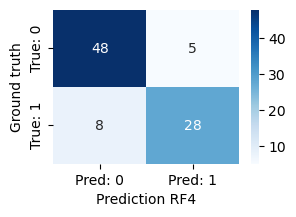

In [255]:
conf_mat_rf4 = confusion_matrix(y_test, predRF4)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_rf4, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction RF4')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_rf4.png", bbox_inches='tight')

In [172]:
print('Precision score:',precision_score(y_test,predRF4).round(4)*100,'%')
print('Recall:',recall_score(y_test, predRF4).round(4)*100,'%')

Precision score: 84.85000000000001 %
Recall: 77.78 %


In [173]:
X_train5 = X_train.drop(['Pclass'],axis=1)
X_test5 = X_test.drop(['Pclass'],axis=1)
X_val5 = X_val.drop(['Pclass'],axis=1)

In [286]:
print(X_train5)

     Sex   Age  SibSp  Parch     Fare
140    1  21.5      0      2  15.2458
439    0  31.0      0      0  10.5000
817    0  31.0      1      1  37.0042
378    0  20.0      0      0   4.0125
491    0  21.0      0      0   7.2500
..   ...   ...    ...    ...      ...
835    1  39.0      1      1  83.1583
192    1  19.0      1      0   7.8542
629    0  25.0      0      0   7.7333
559    1  36.0      1      0  17.4000
684    0  60.0      1      1  39.0000

[712 rows x 5 columns]


In [174]:
k5,v_score = getBestK(X_train5, y_train, X_val5, y_val, n)

print('Validation best score:',v_score)
print('K-Neighbirs:',k5)

Validation best score: 0.8
K-Neighbirs: 3


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [175]:
neigh5 = KNeighborsClassifier(n_neighbors=k5)
neigh5.fit(X_train5, y_train)
predKNN5 = neigh5.predict(X_test5)

print('Testing best score:',neigh5.score(X_test5, y_test).round(4)*100,'%')

Testing best score: 66.29 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

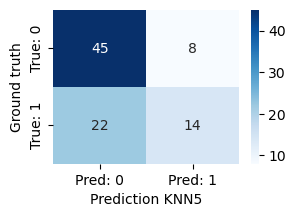

In [253]:
conf_mat_knn5 = confusion_matrix(y_test, predKNN5)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_knn5, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction KNN5')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_knn5.png", bbox_inches='tight')

In [177]:
print('Precision score:',precision_score(y_test,predKNN5).round(4)*100,'%')
print('Recall:',recall_score(y_test, predKNN5).round(4)*100,'%')

Precision score: 63.63999999999999 %
Recall: 38.89 %


In [178]:
c5,g5,ker5,v_score = getBestParams(X_train5, y_train, X_val5, y_val, vals, kernel_ops)

print('Validation best score:',v_score)
print('C:',c5)
print('gamma:',g5)
print('kernel:',ker5)

Validation best score: 0.7888888888888889
C: 3
gamma: 0.02
kernel: rbf


In [179]:
clfSVN5 =  SVC(C=c5, kernel=ker5, gamma=g5)
clfSVN5.fit(X_train5, y_train)
predSVN5 = clfSVN5.predict(X_test5)

print('Testing best score:',clfSVN5.score(X_test5,y_test).round(4)*100,'%')

Testing best score: 70.78999999999999 %


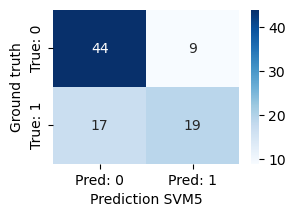

In [275]:
conf_mat_svm5 = confusion_matrix(y_test, predSVN5)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_svm5, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction SVM5')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_svm5.png", bbox_inches='tight')

In [181]:
print('Precision score:',precision_score(y_test,predSVN5).round(4)*100,'%')
print('Recall:',recall_score(y_test, predSVN5).round(4)*100,'%')

Precision score: 67.86 %
Recall: 52.78 %


In [182]:
d5,crit5,max_f5,v_score = getBestTreeParams(X_train5,y_train,X_val5,y_val,maxDepth,criteria,max_featuresint,random)

print('Validation best score:',v_score)
print('Depth:',d5)
print('Criterion:',crit5)
print('Max Features:',max_f5)

Validation best score: 0.8
Depth: 4
Criterion: entropy
Max Features: auto


In [183]:
clfTree5 = tree.DecisionTreeClassifier(max_depth=d5, criterion=crit5, max_features=max_f5,random_state=random)
clfTree5 = clfTree5.fit(X_train5,y_train)
predTree5 = clfTree5.predict(X_test5)

print('Testing best score:',clfTree5.score(X_test5,y_test).round(4)*100,'%')

Testing best score: 84.27 %


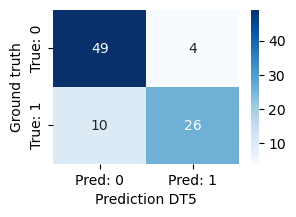

In [251]:
conf_mat_tree5 = confusion_matrix(y_test, predTree5)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_tree5, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction DT5')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_tree5.png", bbox_inches='tight')

In [185]:
print('Precision score:',precision_score(y_test,predTree5).round(4)*100,'%')
print('Recall:',recall_score(y_test, predTree5).round(4)*100,'%')

Precision score: 86.67 %
Recall: 72.22 %


In [186]:
s5, p5, m_iter5, v_score = getBestRegParams(X_train5,y_train, X_val5, y_val, max_iter, solver, random)

print('Validation best score:',v_score)
print('Solver:',s5)
print('Penalty:',p5)
print('Max iteractions:',m_iter5)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Validation best score: 0.7555555555555555
Solver: sag
Penalty: l2
Max iteractions: 500


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [187]:
clfLogReg5 = LogisticRegression(random_state=random,solver=s5,penalty=p5,max_iter=m_iter5)
clfLogReg5.fit(X_train5, y_train)
predLogReg5=clfLogReg5.predict(X_test5)

print('Testing best score:',clfLogReg5.score(X_test5,y_test).round(4)*100,'%')

Testing best score: 77.53 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


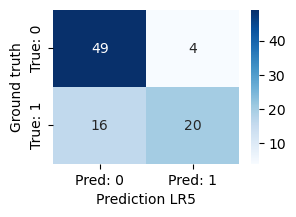

In [250]:
conf_mat_log5 = confusion_matrix(y_test, predLogReg5)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_log5, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction LR5')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_log5.png", bbox_inches='tight')

In [189]:
print('Precision score:',precision_score(y_test,predLogReg5).round(4)*100,'%')
print('Recall:',recall_score(y_test, predLogReg5).round(4)*100,'%')

Precision score: 83.33 %
Recall: 55.559999999999995 %


In [190]:
rf_d5,rf_crit5,rf_max_f5,est5,v_score = getRandomForestsParams(X_train5,y_train,X_val5,y_val,maxDepth,criteria,max_featuresint,n_estim,random)

print('Validation best score:',v_score)
print('Depth:',rf_d5)
print('Criterion:',rf_crit5)
print('Max features:',rf_max_f5)
print('Estimators:',est5)

Validation best score: 0.8222222222222222
Depth: 10
Criterion: gini
Max features: auto
Estimators: 150


In [191]:
clfRF5 = RandomForestClassifier(max_depth=rf_d5, criterion=rf_crit5, max_features=rf_max_f5,n_estimators=est5,random_state=random)
clfRF5 = clfRF5.fit(X_train5,y_train)
predRF5 = clfRF5.predict(X_test5)

print('Training best score =',clfRF5.score(X_test5,y_test).round(4)*100,'%')

Training best score = 87.64 %


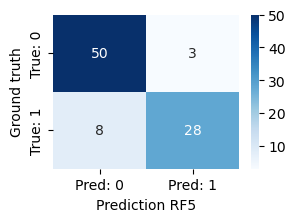

In [249]:
conf_mat_rf5 = confusion_matrix(y_test, predRF5)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_rf5, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction RF5')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_rf5.png", bbox_inches='tight')

In [193]:
print('Precision score:',precision_score(y_test,predRF5).round(4)*100,'%')
print('Recall:',recall_score(y_test, predRF5).round(4)*100,'%')

Precision score: 90.32 %
Recall: 77.78 %


In [194]:
X_train6 = X_train.drop(['Age'],axis=1)
X_test6 = X_test.drop(['Age'],axis=1)
X_val6 = X_val.drop(['Age'],axis=1)

In [287]:
print(X_train6)

     Pclass  Sex  SibSp  Parch     Fare
140       3    1      0      2  15.2458
439       2    0      0      0  10.5000
817       2    0      1      1  37.0042
378       3    0      0      0   4.0125
491       3    0      0      0   7.2500
..      ...  ...    ...    ...      ...
835       1    1      1      1  83.1583
192       3    1      1      0   7.8542
629       3    0      0      0   7.7333
559       3    1      1      0  17.4000
684       2    0      1      1  39.0000

[712 rows x 5 columns]


In [195]:
k6,v_score = getBestK(X_train6, y_train, X_val6, y_val, n)

print('Validation best score:',v_score)
print('K-Neighbirs:',k6)

Validation best score: 0.7666666666666667
K-Neighbirs: 3


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [196]:
neigh6 = KNeighborsClassifier(n_neighbors=k6)
neigh6.fit(X_train6, y_train)
predKNN6 = neigh6.predict(X_test6)

print('Testing best score:',neigh6.score(X_test6, y_test).round(4)*100,'%')

Testing best score: 82.02000000000001 %


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

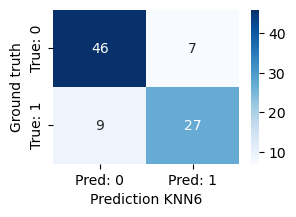

In [248]:
conf_mat_knn6 = confusion_matrix(y_test, predKNN6)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_knn6, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction KNN6')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_knn6.png", bbox_inches='tight')

In [198]:
print('Precision score:',precision_score(y_test,predKNN6).round(4)*100,'%')
print('Recall:',recall_score(y_test, predKNN6).round(4)*100,'%')

Precision score: 79.41 %
Recall: 75.0 %


In [199]:
c6,g6,ker6,v_score = getBestParams(X_train6, y_train, X_val6, y_val, vals, kernel_ops)

print('Validation best score:',v_score)
print('C:',c6)
print('gamma:',g6)
print('kernel:',ker6)

Validation best score: 0.7888888888888889
C: 1
gamma: 3.3333333333333335
kernel: rbf


In [200]:
clfSVN6 =  SVC(C=c6, kernel=ker6, gamma=g6)
clfSVN6.fit(X_train6, y_train)
predSVN6 = clfSVN6.predict(X_test6)

print('Testing best score:',clfSVN6.score(X_test6,y_test).round(4)*100,'%')

Testing best score: 85.39 %


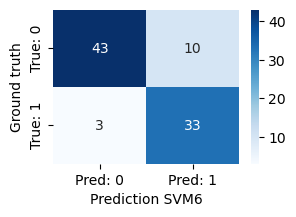

In [247]:
conf_mat_svm6 = confusion_matrix(y_test, predSVN6)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_svm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction SVM6')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_svm6.png", bbox_inches='tight')

In [202]:
print('Precision score:',precision_score(y_test,predSVN6).round(4)*100,'%')
print('Recall:',recall_score(y_test, predSVN6).round(4)*100,'%')

Precision score: 76.74 %
Recall: 91.67 %


In [203]:
d6,crit6,max_f6,v_score = getBestTreeParams(X_train6,y_train,X_val6,y_val,maxDepth,criteria,max_featuresint,random)

print('Validation best score:',v_score)
print('Depth:',d6)
print('Criterion:',crit6)
print('Max Features:',max_f6)

Validation best score: 0.8333333333333334
Depth: 8
Criterion: gini
Max Features: auto


In [204]:
clfTree6 = tree.DecisionTreeClassifier(max_depth=d6, criterion=crit6, max_features=max_f6,random_state=random)
clfTree6 = clfTree6.fit(X_train6,y_train)
predTree6 = clfTree6.predict(X_test6)

print('Testing best score:',clfTree6.score(X_test6,y_test).round(4)*100,'%')

Testing best score: 84.27 %


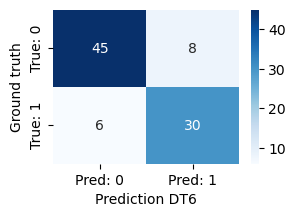

In [246]:
conf_mat_tree6 = confusion_matrix(y_test, predTree6)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_tree6, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction DT6')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_tree6.png", bbox_inches='tight')

In [206]:
print('Precision score:',precision_score(y_test,predTree6).round(4)*100,'%')
print('Recall:',recall_score(y_test, predTree6).round(4)*100,'%')

Precision score: 78.95 %
Recall: 83.33 %


In [207]:
s6, p6, m_iter6, v_score = getBestRegParams(X_train6,y_train, X_val6, y_val, max_iter, solver, random)

print('Validation best score:',v_score)
print('Solver:',s6)
print('Penalty:',p6)
print('Max iteractions:',m_iter6)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Validation best score: 0.7888888888888889
Solver: saga
Penalty: l2
Max iteractions: 50


C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [208]:
clfLogReg6 = LogisticRegression(random_state=random,solver=s6,penalty=p6,max_iter=m_iter6)
clfLogReg6.fit(X_train6, y_train)
predLogReg6=clfLogReg6.predict(X_test6)

print('Testing best score:',clfLogReg6.score(X_test6,y_test).round(4)*100,'%')

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Testing best score: 69.66 %


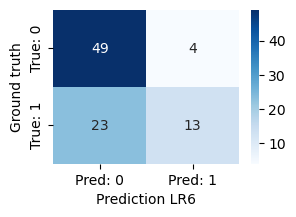

In [276]:
conf_mat_log6 = confusion_matrix(y_test, predLogReg6)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_log6, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction LR6')
plt.ylabel('Ground truth')
plt.show()

plot.get_figure().savefig("./figs/conf_mat_log6.png", bbox_inches='tight',dpi=600)

In [210]:
print('Precision score:',precision_score(y_test,predLogReg6).round(4)*100,'%')
print('Recall:',recall_score(y_test, predLogReg6).round(4)*100,'%')

Precision score: 76.47 %
Recall: 36.11 %


In [211]:
rf_d6,rf_crit6,rf_max_f6,est6,v_score = getRandomForestsParams(X_train6,y_train,X_val6,y_val,maxDepth,criteria,max_featuresint,n_estim,random)

print('Validation best score:',v_score)
print('Depth:',rf_d6)
print('Criterion:',rf_crit6)
print('Max features:',rf_max_f6)
print('Estimators:',est6)

Validation best score: 0.8222222222222222
Depth: 8
Criterion: entropy
Max features: auto
Estimators: 50


In [212]:
clfRF6 = RandomForestClassifier(max_depth=rf_d6, criterion=rf_crit6, max_features=rf_max_f6,n_estimators=est6,random_state=random)
clfRF6 = clfRF6.fit(X_train6,y_train)
predRF6 = clfRF6.predict(X_test6)

print('Training best score =',clfRF6.score(X_test6,y_test).round(4)*100,'%')

Training best score = 89.89 %


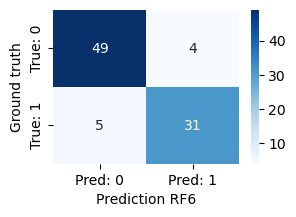

In [244]:
conf_mat_rf6 = confusion_matrix(y_test, predRF6)

plt.figure(figsize=(3,2))
plot=sns.heatmap(conf_mat_rf6, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.xlabel('Prediction RF6')
plt.ylabel('Ground truth')

plot.get_figure().savefig("./figs/conf_mat_rf6.png", bbox_inches='tight',dpi=600)
plt.show()


In [214]:
print('Precision score:',precision_score(y_test,predRF6).round(4)*100,'%')
print('Recall:',recall_score(y_test, predRF6).round(4)*100,'%')

Precision score: 88.57000000000001 %
Recall: 86.11 %


## Clusting

In [215]:
from sklearn.cluster import KMeans

In [216]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


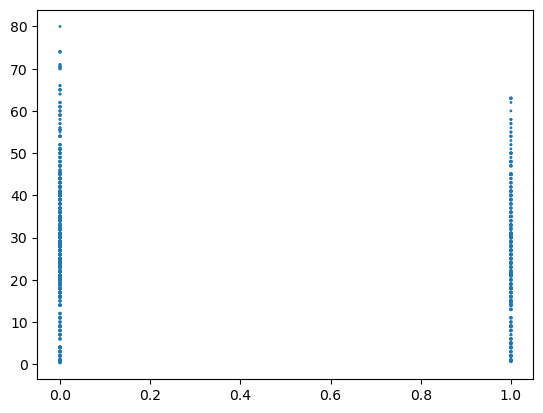

In [217]:
X = data_train.loc[:,['Sex','Age','Pclass']]
y = data_train.loc[:,'Survived']

fig, ax = plt.subplots()

ax.scatter(X.Sex,X.Age,X.Pclass)

plt.show()


In [218]:
#Find best k value

k_values = []
inertias = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    inertias.append(kmeans.inertia_)

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


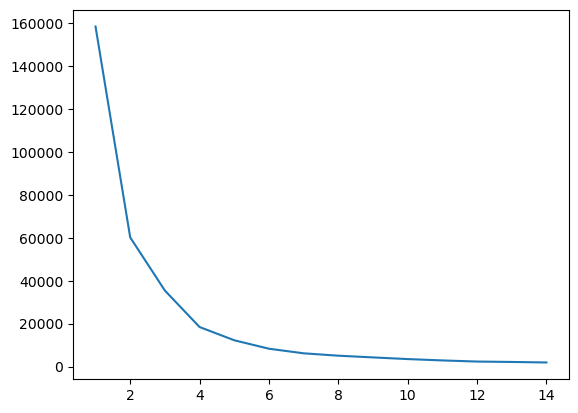

In [219]:
fig, ax = plt.subplots()

ax.plot(k_values, inertias )

plt.show()

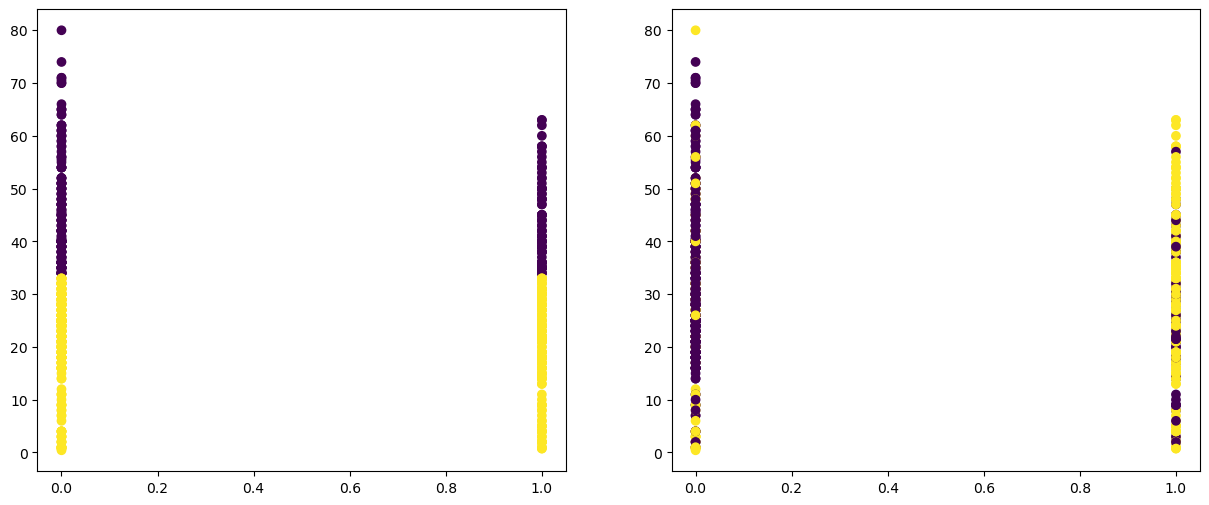

In [220]:
#Compare targets and labes 
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

ax[0].scatter(X.Sex,X.Age, c = kmeans.labels_)
ax[1].scatter(X.Sex,X.Age, c = y)

plt.show()

In [221]:
#Verify k adjusted_rand_score
from sklearn import metrics

k_values = []
ARS = []
RS = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    ARS.append(metrics.adjusted_rand_score(y, kmeans.labels_))
    RS.append(metrics.rand_score(y, kmeans.labels_))

C:\Users\bruno\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


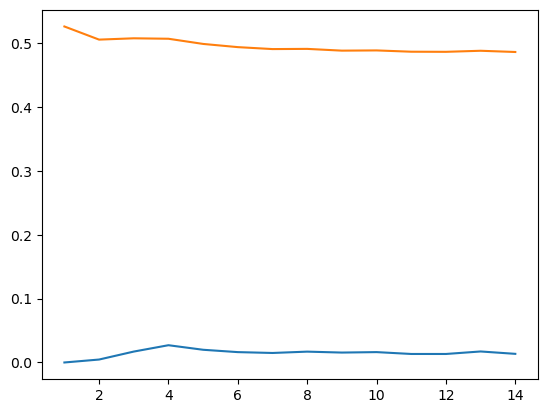

In [222]:
fig, ax = plt.subplots()

ax.plot(k_values, ARS)
ax.plot(k_values, RS)

plt.show()

In [223]:
#Verifying K with silhouett_score
k_values = []
s = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    k_values.append(i)
    s.append(metrics.silhouette_score(X, kmeans.labels_))

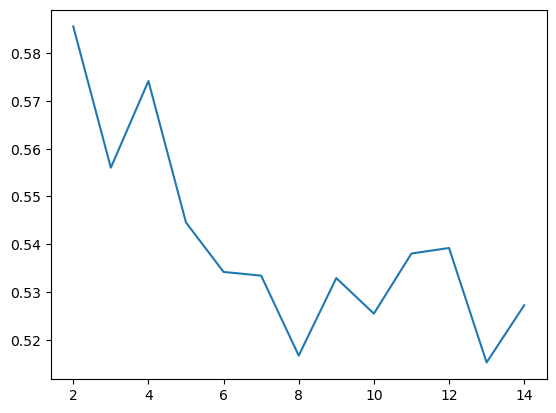

In [224]:
fig, ax = plt.subplots()

ax.plot(k_values, s)

plt.show()